In [98]:
 %matplotlib inline

### Get player IDs for roster

In [19]:
from nba_api.stats.static import players

roster = ["Dejounte Murray",
          "Royce O'Neale",
          "Franz Wagner",
          "Tobias Harris",
          "Trendon Watford",
          "Desmond Bane",
          "Nick Richards",
          "Jakob Poeltl",
          "Marcus Smart",
          "Kawhi Leonard",
          "Jalen Duren",
          "Jonas Valanciunas",
          "Nikola Jokic",
          "Jalen Brunson"]

player_ids = [players.find_players_by_full_name(player)[0]['id'] for player in roster]

### Get game logs for roster

In [66]:

from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
import numpy as np


game_logs =[]
for i in player_ids:
    game_logs.append(playergamelog.PlayerGameLog(player_id=i, season = SeasonAll.current_season).get_data_frames()[0])

player_data = dict(zip(roster, game_logs))

### Start visualizing data

Text(0, 0.5, 'Points per game')

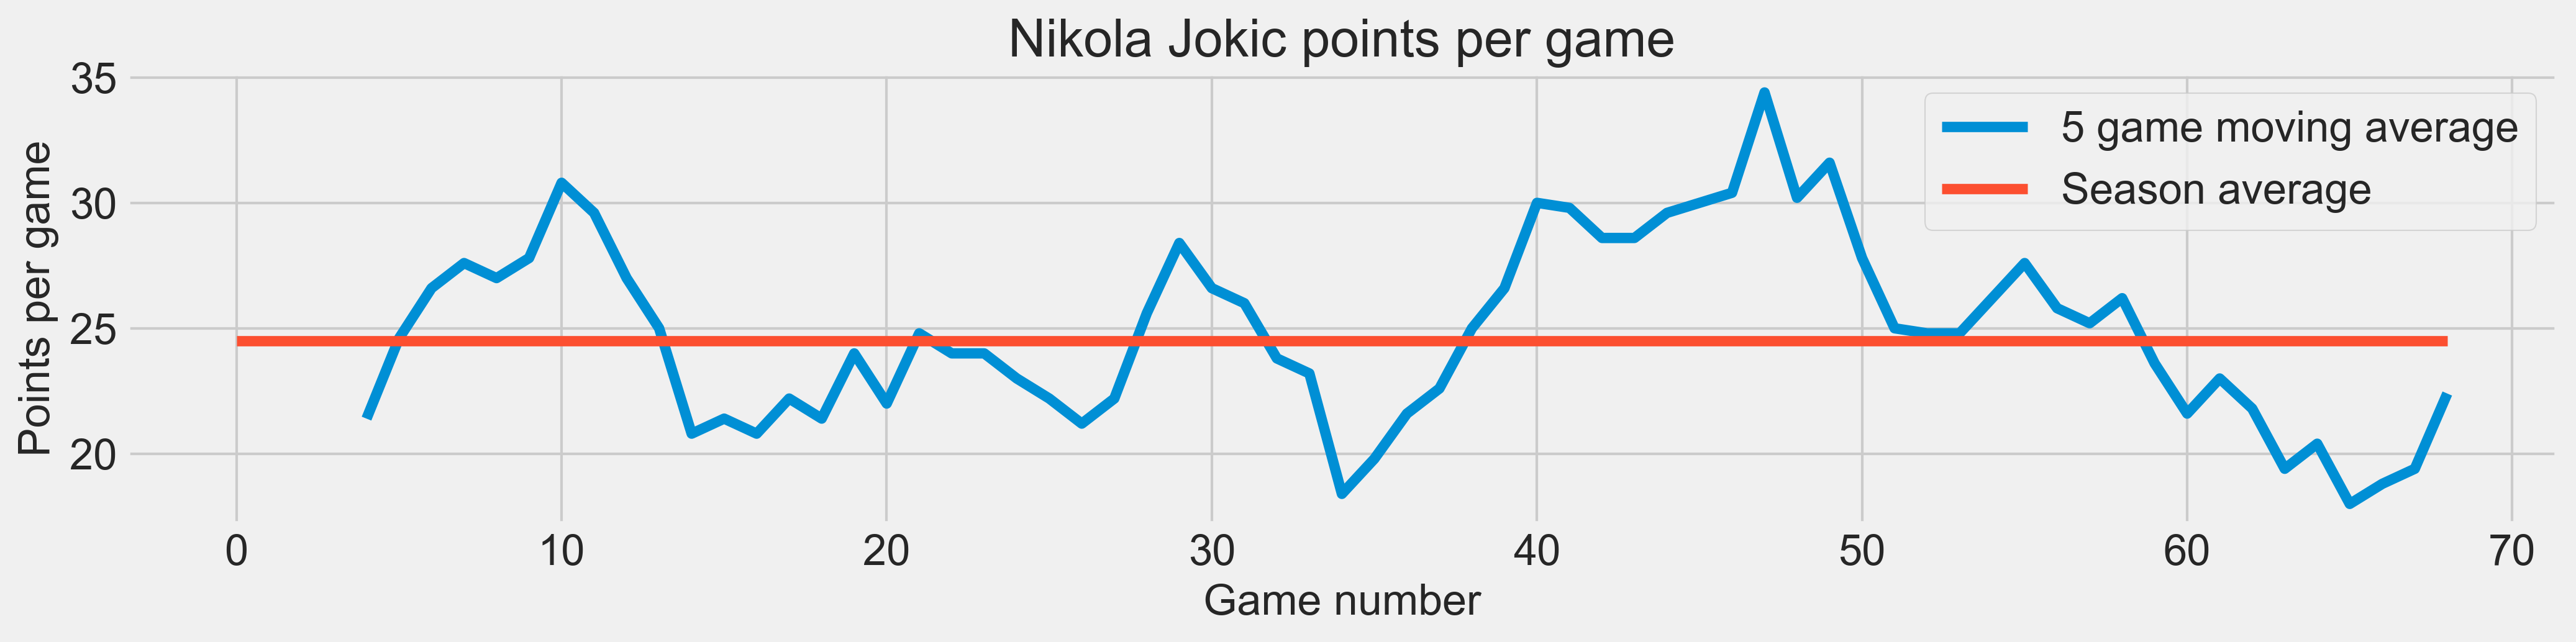

In [99]:
#Calculate points per game for each player 
for player in player_data:
    player_data[player]['PTS/G'] = sum(player_data[player]['PTS']) / player_data[player]['GAME_DATE'].count()

#Calculate the moving average of points per game
for player in player_data:
    player_data[player]['PPG_MA'] = player_data[player]['PTS'].rolling(window=5).mean()

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [15, 3]
plt.plot(player_data['Nikola Jokic']['PPG_MA'])
plt.plot(player_data['Nikola Jokic']['PTS/G'])
plt.legend(['5 game moving average', 'Season average'])
plt.title('Nikola Jokic points per game')
plt.xlabel('Game number')
plt.ylabel('Points per game')